# Time Series Analysis with ARMA and ARIMA

In this notebook I have tried the cover the following ways to perform time-series analysis - 

1. Random Walk
2. Moving averages Models (MA Models)
3. Autoregression Models (AR Models)
4. Autoregressive Moving Averages (ARMA Models)
5. Autoregressive Integrated Moving Averages (ARIMA Models)



# Random Walk Model

The random walk hypothesis is a financial theory stating that stock market prices evolve according to a random walk and thus cannot be predicted. A Random Walk Model beleives that [1]:

1. Changes in stock prices have the same distribution and are independent of each other.
2. Past movement or trend of a stock price or market cannot be used to predict its future movement.
3. It's impossible to outperform the market without assuming additional risk.
4. Considers technical analysis undependable because it results in chartists only buying or selling a security after a move has occurred.
5. Considers fundamental analysis undependable due to the often-poor quality of information collected and its ability to be misinterpreted.

A random walk model can be expressed as : <br>
<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/random_walk_1.png?raw=1" width=150, height=50><img>

This formula represents that location at the present time t is the sum of the previous location and noise, expressed by *Z.*

## Simulating returns with Random Walk

### Importing libraries

Here, we are importing important libraries needed for visualization and also for simulating random walk model.

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

Now we generate 1000 random points by adding a degree of randomness to the previous point to generate the next point with 0 as starting point.

In [2]:
# Draw samples from a standard Normal distribution (mean=0, stdev=1).
points = np.random.standard_normal(1000)

# making starting point as 0
points[0]=0

# Return the cumulative sum of the elements along a given axis.
random_walk = np.cumsum(points)
random_walk_series = pd.Series(random_walk)

### Plotting the simulated Random Walk model
Now, lets plot our dataset

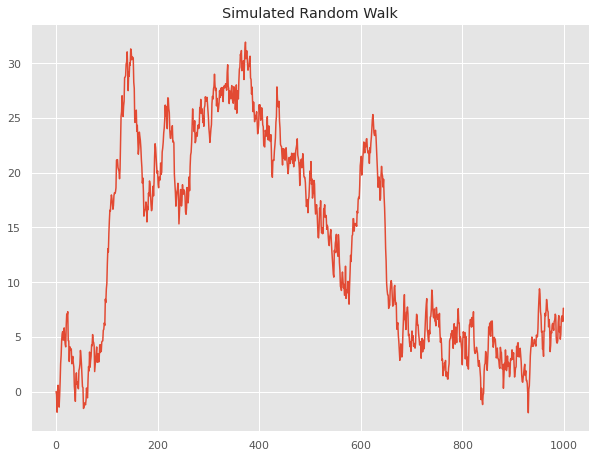

In [3]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk)
plt.title("Simulated Random Walk")
plt.show()

### Autocorrelational Plots
An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other.An autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1.

We can calculate the correlation for time series observations with observations with previous time steps, called *lags*. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an *autocorrelation*.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


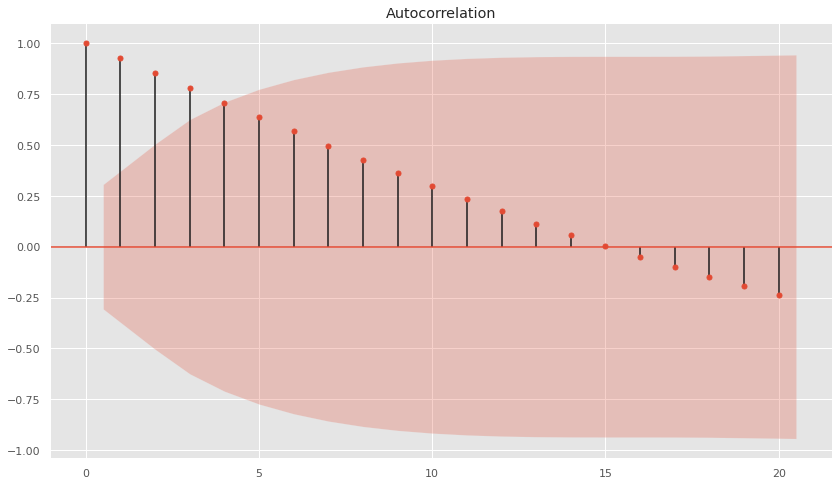

In [4]:
random_walk_acf = acf(random_walk)
acf_plot = plot_acf(random_walk_acf, lags=20)

Looking at the corelation plot we can say that the *process is not stationary.* But there is a way to remove this trend. I am going to try to different ways to make this process a stationary one -
1. Knowing that a random walk adds a random noise to the previous point, if we take the difference between each point with its previous one, we should obtain a purely random stochastic process.
2. Taking the log return of the prices.

### Difference between 2 points

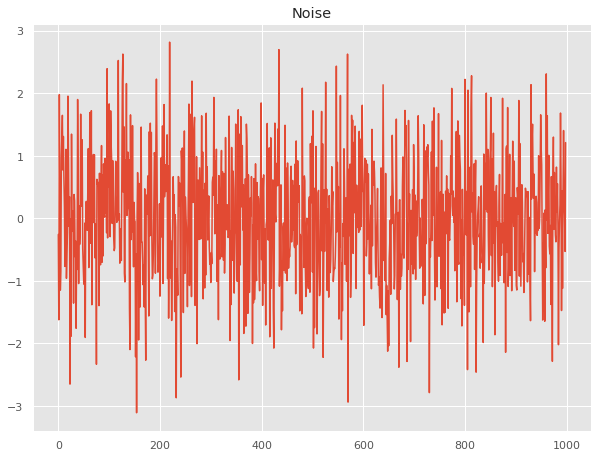

In [5]:
random_walk_difference = np.diff(random_walk, n=1)

plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(random_walk_difference)
plt.title('Noise')
plt.show()

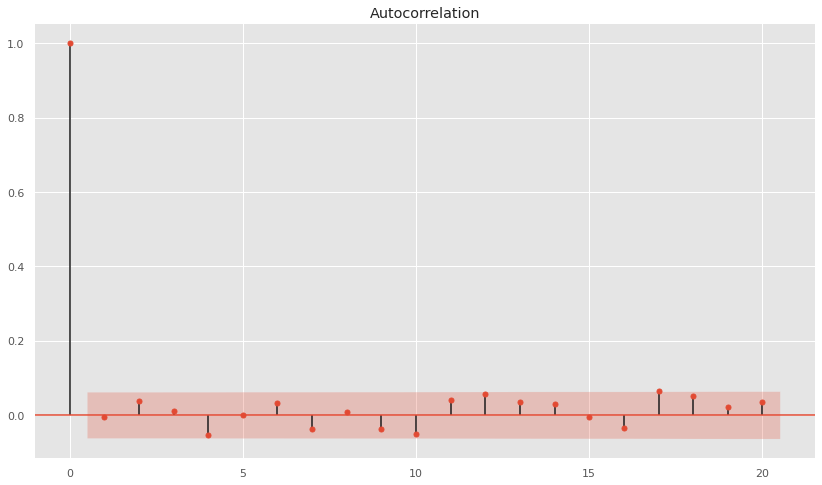

In [6]:
cof_plot_difference = plot_acf(random_walk_difference, lags=20);

We see that this is the correlogram of a purely random process, where the autocorrelation coefficients drop at lag 1.


# Moving Average Models (MA Models)

In MA models, we start with average mu, to get the value at time t, we add a linear combination of residuals from previous time stamps. In finance, residual refers to new unpredictable information that can't be captured by past data points. The residuals are difference between model's past prediction and actual values. <br><br>
Moving average models are defined as MA(q) where q is the lag.

<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/2.%20MA%20model.png?raw=1" width=400, height=230></img><br><br>

Taking an example of MA model of order 3, denoted as MA(3):<br><br>

<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/3.%20ma%203.png?raw=1" width=400, height=250></img><br><br>

The equation above says that the position y at time t depends on the noise at time t, plus the noise at time t-1 (with a certain weight epsilon), plus some noise at time t-2 (with a certain weights), plus some noise at time t-3.


In [7]:
from statsmodels.tsa.arima_process import ArmaProcess

# start by specifying the lag
ar3 = np.array([3])

# specify the weights : [1, 0.9, 0.3, -0.2]
ma3 = np.array([1, 0.9, 0.3, -0.2])

# simulate the process and generate 1000 data points
MA_3_process = ArmaProcess(ar3, ma3).generate_sample(nsample=1000)

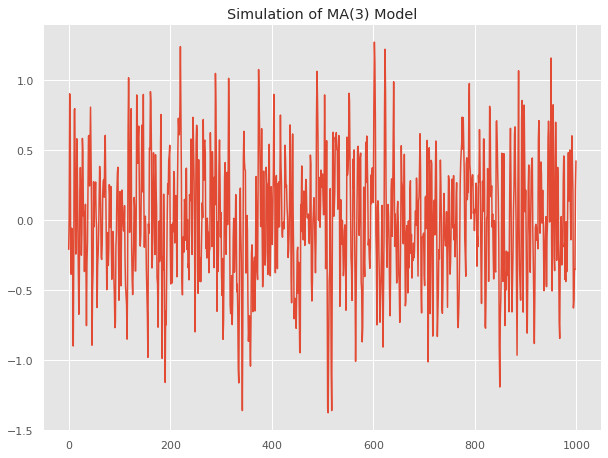

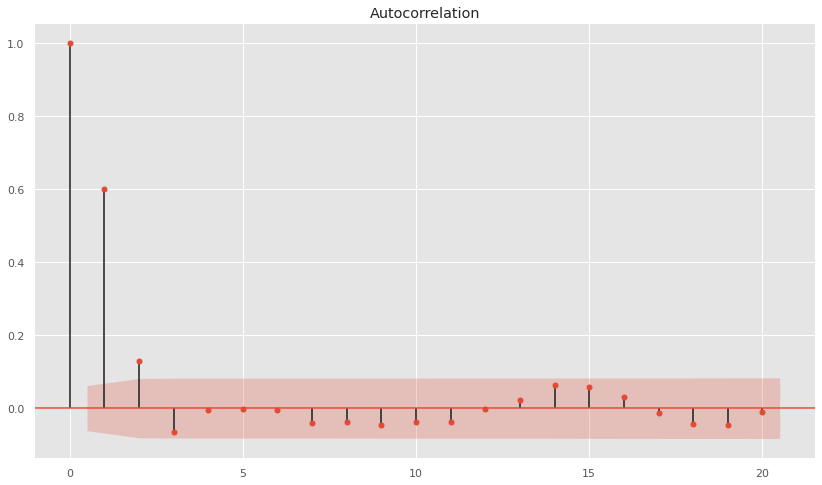

In [8]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(MA_3_process)
plt.title('Simulation of MA(3) Model')
plt.show()
plot_acf(MA_3_process, lags=20);

As you can see, there is a significant correlation upto lag 3. Afterwards, the correlation is not significant anymore. This makes sense since we specified a formula with a lag of 3.

# AutoRegression Models (AR Models)

An auto-regressive models (AR Models) tries to fit in a line that is linear combination of previous values. It includes an intercept, that is indipendent of previous values. It also contains error term to represent movements that cannot be predicted by previous terms.

<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/1.%20AR%20models.png?raw=1" width=400, height=250></img>

An AR model is defined by its lag. If an AR model uses only yesterday's value and ignores the rest, its called AR Lag 1, if the model uses two previous days values and ignores the rest, its called AR Lag 2 and so on.

<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/2.%20Lag.png?raw=1" width=400, height=250></img>

Usually, autoregressive models are applied to stationary time series only. This constrains the range of the parameters phi. For example, an AR(1) model will constrain phi between -1 and 1. Those constraints become more complex as the order of the model increases, but they are automatically considered when modelling in Python. [1]

## Simulating return series with autoregressive properties

For simulating a AR(3) process, we will be using [ArmaProcess](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_process.ArmaProcess.html).

For this, let us take the same example that we used to simulate random walk model :<br><br>

<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/3.%20ma%203.png?raw=1" width=400, height=250></img><br><br>

Since we are dealing with an autoregressive model of order 3, we need to define the coefficient at lag 0, 1, 2 and 3.
Also, we will cancel the effect of a moving average process.
Finally, we will generate 10000 data points.


In [9]:
ar3 = np.array([1, 0.9, 0.3, -0.2])
ma = np.array([3])
simulated_ar3_points = ArmaProcess(ar3, ma).generate_sample(nsample=10000)

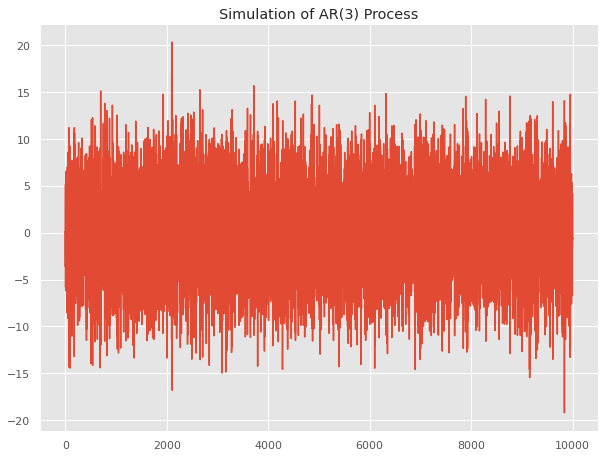

In [10]:
plt.figure(figsize=[10, 7.5]); # Set dimensions for figure
plt.plot(simulated_ar3_points)
plt.title("Simulation of AR(3) Process")
plt.show()

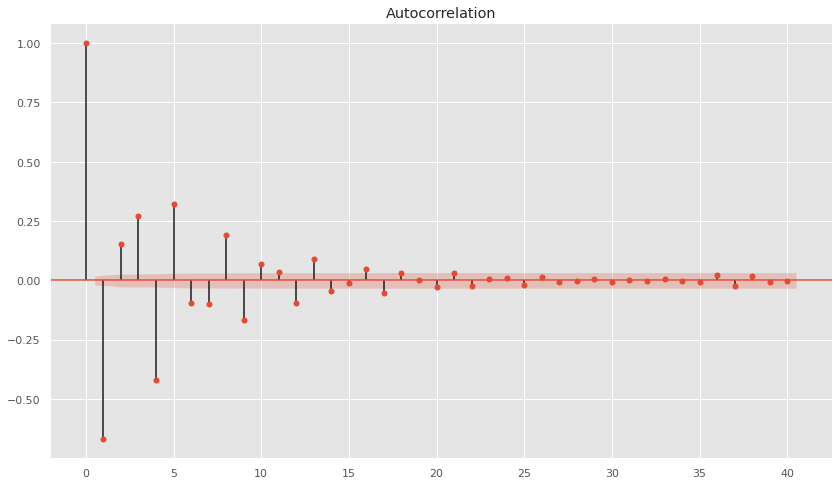

In [11]:
plot_acf(simulated_ar3_points);

Looking at the correlation plot, we can see that the coefficient is slowly decaying. Now lets plot the corresponding partial correlation plot.

### Partial Autocorrelation Plot

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. 

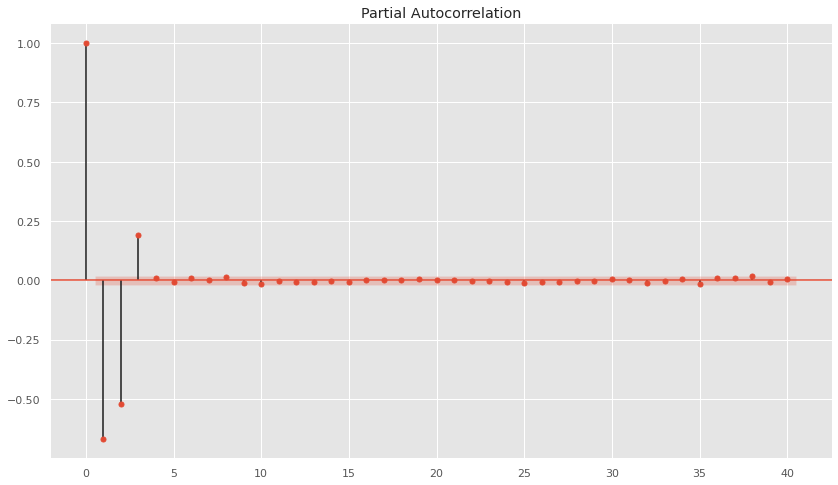

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(simulated_ar3_points);

As you can see the coefficients are not significant after lag 3. Therefore, the partial autocorrelation plot is useful to determine the order of an AR(p) process. You can also view these values using the import statement `from statsmodels.tsa.stattools import pacf`

In [13]:
from statsmodels.tsa.stattools import pacf

pacf_coef_AR3 = pacf(simulated_ar3_points)
print(pacf_coef_AR3)

[ 1.00000000e+00 -6.66621292e-01 -5.22543387e-01  1.91927148e-01
  8.85891466e-03 -5.11232764e-03  9.99613580e-03  2.60075511e-03
  1.57012823e-02 -9.04412597e-03 -1.54798930e-02 -1.76072642e-03
 -8.05142778e-03 -6.62126050e-03 -4.16417542e-03 -7.73246376e-03
  3.65811767e-03  1.49229622e-03  2.52808512e-04  5.09524237e-03
  2.48164050e-03  1.14645939e-03 -4.19683450e-03 -2.19310744e-03
 -6.97489914e-03 -1.10951393e-02 -8.07586216e-03 -5.94314589e-03
 -1.42216270e-03 -1.06170627e-03  6.30871543e-03  1.96095518e-03
 -1.15254644e-02 -1.44109415e-03  5.98542037e-03 -1.71193014e-02
  1.18433023e-02  1.18115926e-02  1.83999763e-02 -5.36534421e-03
  4.99441978e-03]


# Autoregressive Moving Average Models (ARMA Models)

The ARMA model is defined with a *p* and *q*. p is the lag for *autoregression* and q is lag for *moving average*. Regression based training models require data to be stationary. For a non-stationary dataset, the mean, variance and co-variance may change over time. This causes difficulty in predicting future based on past.

Looking back at the equation of Autoregressive Model (AR Model) :<br><br>

<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/1.%20AR%20models.png?raw=1" width=400, height=250></img>

Looking at the equation of Moving Average Model (MA Model) : <br><br>

<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/2.%20MA%20model.png?raw=1" width=400, height=230></img><br><br>


Equation of ARMA model is simply the combination of the two :<br><br>


<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/4.%20ARMA.png?raw=1" width=700, height=400></img><br><br>

Hence, this model can explain the relationship of a time series with both random noise (moving average part) and itself at a previous step (autoregressive part).


### Simulating ARMA(1,1) Process

Here, we will be simulating an ARMA(1, 1) model whose equation is :<br>


<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/5.%20ARMA_1_1.png?raw=1" width=400, height=100></img><br><br>


In [14]:
ar1 = np.array([1, 0.6])
ma1 = np.array([1, -0.2])
simulated_ARMA_1_1_points = ArmaProcess(ar1, ma1).generate_sample(nsample=10000)

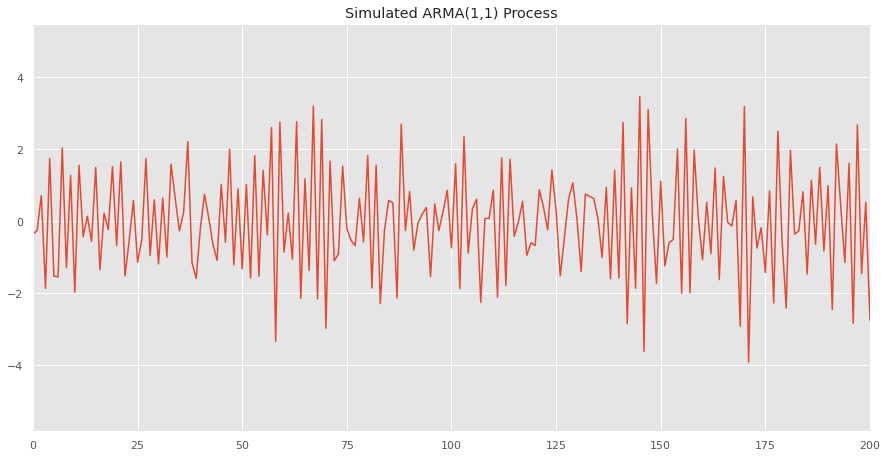

In [15]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA_1_1_points)
plt.title("Simulated ARMA(1,1) Process")
plt.xlim([0, 200])
plt.show()

plotting ACF and PACF plots:

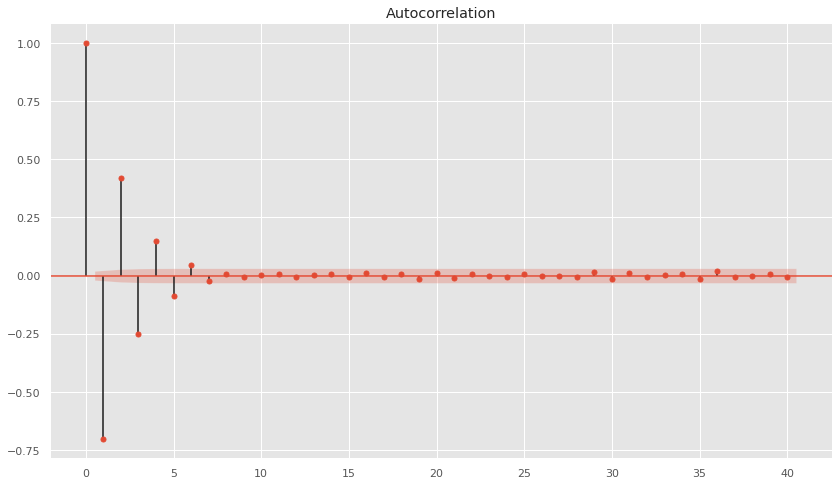

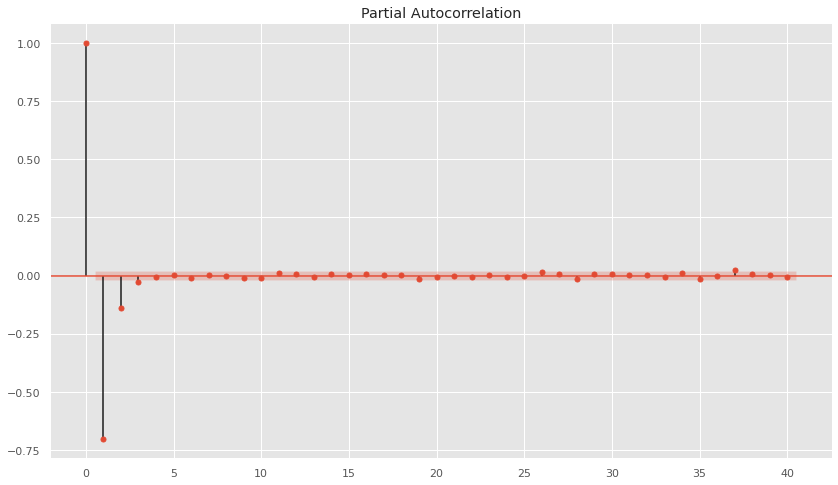

In [16]:
plot_acf(simulated_ARMA_1_1_points);
plot_pacf(simulated_ARMA_1_1_points);

As you can see, we cannot infer the order of the ARMA process by looking at these plots. In fact, looking closely, we can see some sinusoidal shape in both ACF and PACF functions. 

### Simulating ARMA(2, 2) Process

Here, we will be simulating an ARMA(2, 2) model whose equation is :<br>


<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/6.%20ARMA_2_2.png?raw=1" width=500, height=200></img><br><br>


In [17]:
ar2 = np.array([1, 0.6, 0.4])
ma2 = np.array([1, -0.2, -0.5])

simulated_ARMA_2_2_points = ArmaProcess(ar2, ma2).generate_sample(nsample=10000)

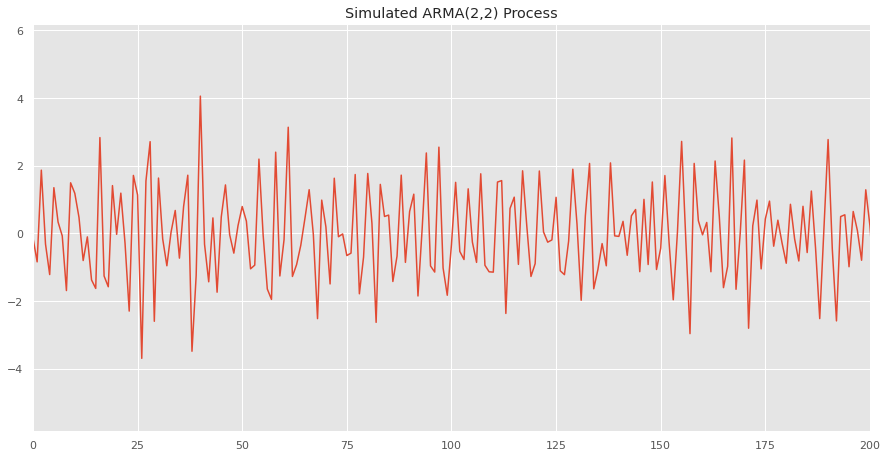

In [18]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(simulated_ARMA_2_2_points)
plt.title("Simulated ARMA(2,2) Process")
plt.xlim([0, 200])
plt.show()

plotting the ACF and PACF graph:

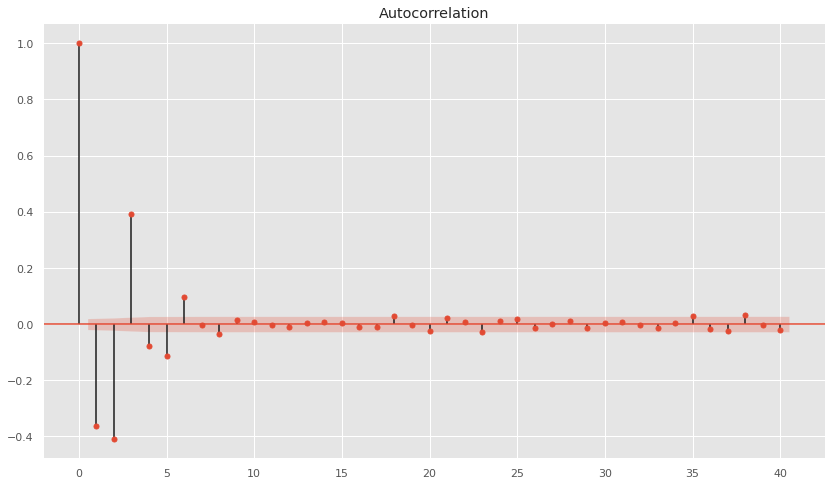

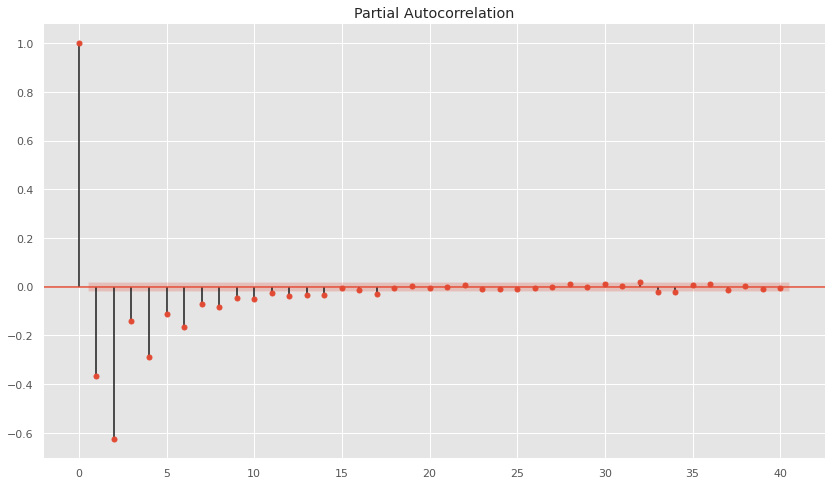

In [19]:
plot_acf(simulated_ARMA_2_2_points);
plot_pacf(simulated_ARMA_2_2_points);

As you can see, both plots exhibit the same sinusoidal trend, which further supports the fact that both an AR(p) process and a MA(q) process is in play.

# Autoregressive Integrated Moving Average Models (ARIMA Models)

This model is the combination of autoregression, a moving average model and differencing. In this context, integration is the opposite of differentiation.

Differentiation is useful to remove the trend in a time series and make it stationary.<br>
It simply involves subtracting a point a t-1 from time t. <br>

Mathematically, the ARIMA(p,d,q) now requires three parameters:<br>
1. p: the order of the autoregressive process
2. d: the degree of differentiation (number of times it was differenced)
3. q: the order of the moving average process

and the equations is expressed as:


<img src="https://github.com/purvasingh96/AI-for-Trading/blob/master/Term%201/Theorey%20%26%20Quizes/4.%20Time%20Series%20Modelling/images/7.%20arima.png?raw=1" width=800, height=300></img><br><br>


In [20]:
np.random.seed(200)

ar_params = np.array([1, -0.4])
ma_params = np.array([1, -0.8])

returns = ArmaProcess(ar_params, ma_params).generate_sample(nsample=1000)

returns = pd.Series(returns)
drift = 100

price = pd.Series(np.cumsum(returns)) + drift

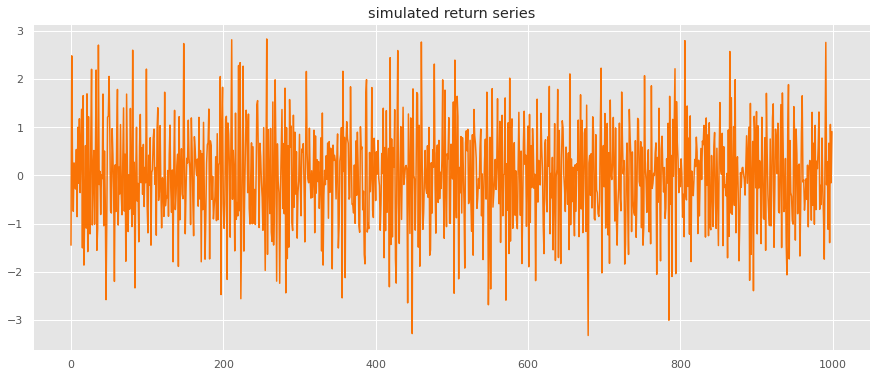

In [21]:
returns.plot(figsize=(15,6), color=sns.xkcd_rgb["orange"], title="simulated return series")
plt.show()

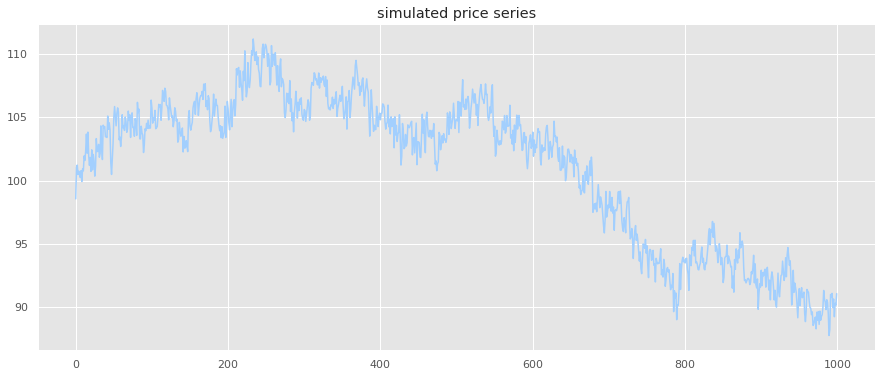

In [22]:
price.plot(figsize=(15,6), color=sns.xkcd_rgb["baby blue"], title="simulated price series")
plt.show()

### Extracting stationary data

One way to get stationary time-series is by taking difference between points in time-series. This time difference is called *rate of change.*

`rate_of_change = current_price / previous_price`

The corresponding *log return* will become : 

`log_returns = log(current_price) - log(previous_price)`

In [23]:
log_return = np.log(price) - np.log(price.shift(1))
log_return = log_return[1:]

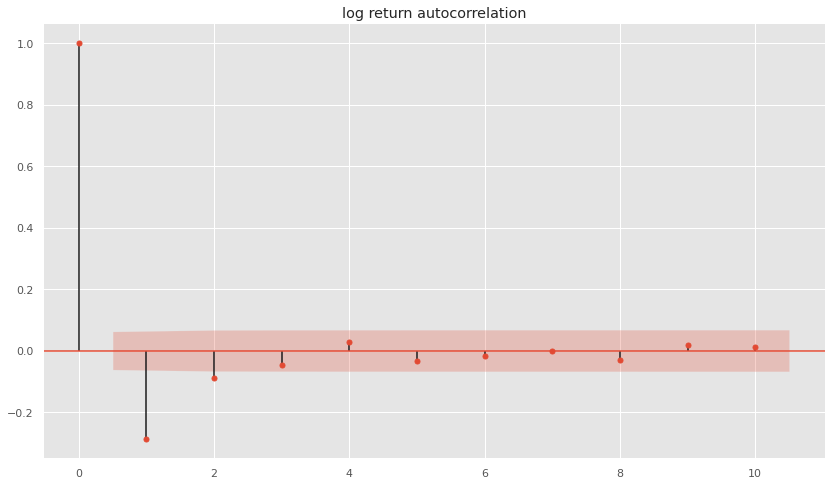

In [24]:
_ = plot_acf(log_return,lags=10, title='log return autocorrelation')

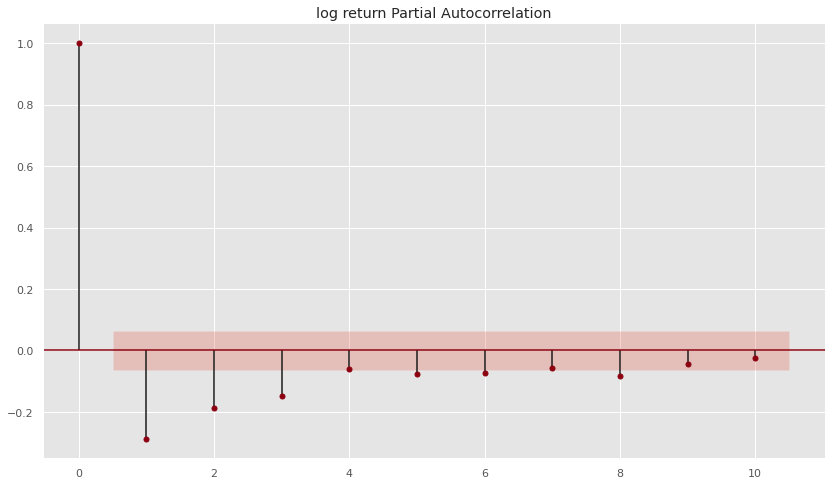

In [25]:
_ = plot_pacf(log_return, lags=10, title='log return Partial Autocorrelation', color=sns.xkcd_rgb["crimson"])

In [26]:
from statsmodels.tsa.arima_model import ARIMA

def fit_arima(log_returns):
        ar_lag_p = 1
        ma_lag_q = 1
        degree_of_differentiation_d = 0

        # create tuple : (p, d, q)
        order = (ar_lag_p, degree_of_differentiation_d, ma_lag_q)

        # create an ARIMA model object, passing in the values of the lret pandas series,
        # and the tuple containing the (p,d,q) order arguments
        arima_model = ARIMA(log_returns.values, order=order)
        arima_result = arima_model.fit()

        #TODO: from the result of calling ARIMA.fit(),
        # save and return the fitted values, autoregression parameters, and moving average parameters
        fittedvalues = arima_result.fittedvalues
        arparams = arima_result.arparams
        maparams = arima_result.maparams

        return fittedvalues,arparams,maparams


fitted AR parameter 0.38, MA parameter -0.78


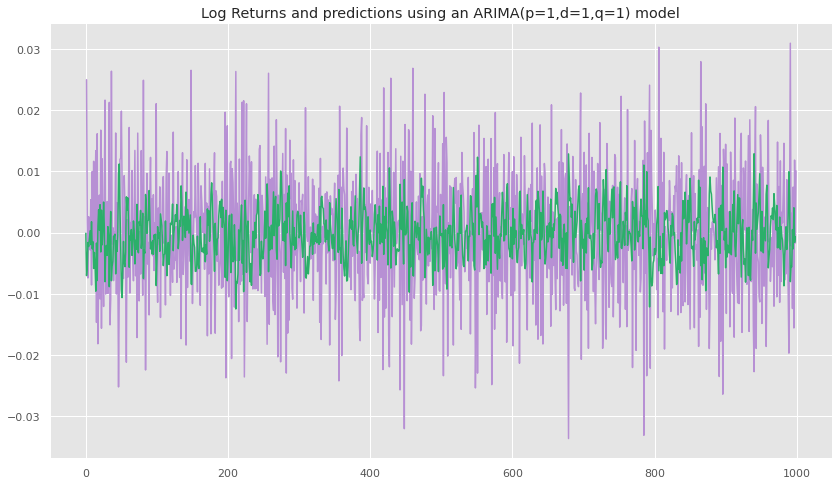

In [27]:
fittedvalues,arparams,maparams = fit_arima(log_return)
arima_pred = pd.Series(fittedvalues)
plt.plot(log_return, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1,d=1,q=1) model');
print(f"fitted AR parameter {arparams[0]:.2f}, MA parameter {maparams[0]:.2f}")

# References

1. https://towardsdatascience.com/how-to-model-time-series-in-python-9983ebbf82cf
2. https://towardsdatascience.com/advanced-time-series-analysis-with-arma-and-arima-a7d9b589ed6d
3. https://towardsdatascience.com/time-series-forecasting-with-autoregressive-processes-ba629717401
4. https://stackoverflow.com/questions/52815990/valueerror-the-computed-initial-ma-coefficients-are-not-invertible-you-should-i
5. Udacity's nanodegree course on AI for Trading.